# DIET COMPOSITIONS

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

diet_data = pd.read_excel('H:/MyDocuments/IIASA-Felix/Model files/New_DietData.xlsx', sheetname='Diet-Population')
diet_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,Average Diet Composition FAO 2013,Flexitarian Diet,Health Diet WHO - Springmann,World Ref Diet Composition - WRI,Meat diet,Vegetarian,Weighted average,color
PasMeat,1.77,0.45,1.34,1.8,2.3,0.0,0,darkred
CropMeat,7.54,2.52,4.09,6.7,7.2,0.0,0,indianred
Dairy,6.92,7.98,7.78,4.0,6.7,7.0,0,tomato
Eggs,1.25,0.76,0.74,1.2,1.0,2.0,0,lightsalmon
Grains,46.11,29.99,29.23,54.0,46.8,52.0,0,green
Pulses,2.36,7.06,6.88,2.3,2.0,3.8,0,darkgreen
VegFruits,12.77,12.06,11.76,10.0,8.0,12.0,0,limegreen
OtherCrops,20.40,38.43,37.45,20.0,26.0,26.0,0,lightgreen


In [6]:
def make_donut(data, colors, midlabel, file_name):
    fig, ax =  plt.subplots()
    fig.set_figwidth(5)
    width = 0.5
    ax.axis('equal')
    
    outside1, _, fr1 = ax.pie(data, radius=1.2, startangle=60,
                              autopct='%1.1f%%', pctdistance=1-width/2, 
                              colors=colors, wedgeprops={'linewidth': 3})
    for text in _:
        text.set_size(14)
        
    for patch, txt in zip(outside1, fr1):
        # the angle at which the text is located
        ang = (patch.theta2 + patch.theta1) / 2.
        # new coordinates of the text, 0.7 is the distance from the center 
        if txt.get_text() == '0.5%':
            x = patch.r * 1 * np.cos(ang*np.pi/180)+.1
            y = patch.r * 1.1 * np.sin(ang*np.pi/180) - .05
        else:
            x = patch.r * 1 * np.cos(ang*np.pi/180)
            y = patch.r * 1.1 * np.sin(ang*np.pi/180)
        # if patch is narrow enough, move text to new coordinates
        if (patch.theta2 - patch.theta1) < 10.:
            txt.set_position((x, y))
            
    kwargs = dict(size=16, fontweight='bold', va='center')
    ax.text(0, 0, midlabel, ha='center', **kwargs)

    plt.setp(outside1, width=width, edgecolor='white')
    plt.legend(outside1, data.index, loc="upper corner", bbox_to_anchor = (1.01, 0.85), fontsize=14)
    plt.savefig(file_name, dpi=600,  bbox_inches='tight')

    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:638: UserWarning: Unrecognized location "upper corner". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


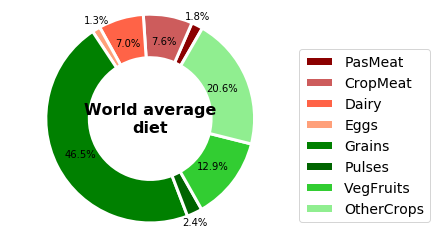

In [7]:
data = diet_data['Average Diet Composition FAO 2013']
colors = diet_data['color']
midlabel = "World average\ndiet"
file_name = './AvgDiet_Pie_v2.png'
make_donut(data, colors, midlabel, file_name)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:638: UserWarning: Unrecognized location "upper corner". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


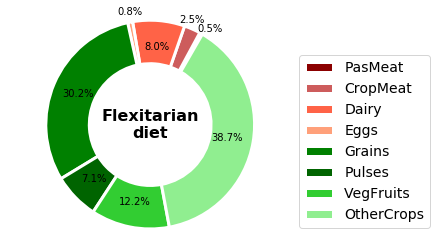

In [8]:
data = diet_data['Flexitarian Diet']
colors = diet_data['color']
midlabel = "Flexitarian\ndiet"
file_name = './Flexitarian_Pie_v2.png'
make_donut(data, colors, midlabel, file_name)

# REFERENCE DIET COMPOSITION SCENARIOS

# EMA Runs

In [1]:
import sys
sys.path.append(r"C:\Users\eker\AppData\Local\Continuum\anaconda3\Lib\site-packages\ema_workbench")
sys.path.append(r"C:\Windows\SysWOW64\VenDLL32.dll")

from ema_workbench.connectors.vensim import VensimModel

directory = 'H:/MyDocuments/IIASA-Felix/Model files/'
vensimModel = VensimModel("DietModel", wd=directory, model_file=r'FeliX3_Sibel_v15.vpm')

C:\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:18: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:23: ImportWarning: pysd connector not available
  warnings.warn("pysd connector not available", ImportWarning)


In [2]:
# READ UNCERTAINTY AND OUTCOME NAMES FROM EXCEL
import pandas as pd

df_unc = pd.read_excel(directory+'ScenarioFramework.xlsx', sheet_name='Uncertainties')
df_out = pd.read_excel(directory+'ScenarioFramework.xlsx', sheet_name='Outcomes')

In [3]:
df_out.head()

,Outcomes
0,Total Vegetarians
1,Food production rate[PasMeat]
2,Food production rate[CropMeat]
3,Food production rate[Pulses]
4,Food production rate[Grains]


In [4]:
df_unc['Min'] = df_unc['Reference'] * 0.5
df_unc['Max'] = df_unc['Reference'] * 1.5
df_unc.head()

,Uncertainties,Reference,Min,Max
0,SA Response efficacy multiplier[noEd],0.8,0.40,1.20
1,SA Response efficacy multiplier[primary],0.9,0.45,1.35
2,SA Response efficacy multiplier[secondary],1.0,0.50,1.50
3,SA Response efficacy multiplier[tertiary],1.2,0.60,1.80
4,SA Self efficacy multiplier[male],0.8,0.40,1.20


In [5]:
df_out['Outcomes']

0                             Total Vegetarians
1                 Food production rate[PasMeat]
2                Food production rate[CropMeat]
3                  Food production rate[Pulses]
4                  Food production rate[Grains]
5                          Total area harvested
6      Commercial N application for agriculture
7      Commercial P application for agriculture
8                        Mean Species Abundance
9                                   Forest Land
10        Temperature Change from Preindustrial
11                Percentage of animal calories
12    Total Agricultural and Land Use Emissions
13      Percentage of vegetarian diet followers
Name: Outcomes, dtype: object

In [1]:
from ema_workbench import (TimeSeriesOutcome, 
                           perform_experiments,
                           RealParameter, 
                           CategoricalParameter,
                           ema_logging, 
                           save_results,
                          load_results)


In [80]:
from ema_workbench import (TimeSeriesOutcome, 
                           perform_experiments,
                           RealParameter, 
                           CategoricalParameter,
                           ema_logging, 
                           save_results)

vensimModel.outcomes = [TimeSeriesOutcome(out) for out in df_out['Outcomes']]

#vensimModel.uncertainties = [RealParameter(row['Uncertainties'], row['Min'], row['Max']) for index, row in df_unc.iterrows()] + [CategoricalParameter('Diet Composition Switch', [0, 1, 2, 3, 4])]
import  time
start = time.time()
#results = perform_experiments(vensimModel, 10000)
end = time.time()
print("took {} seconds".format(end-start))

fn = './Diet_experiments_10000.tar.gz'

#save_results(results, fn)

took 0.0 seconds


In [9]:
from ema_workbench import load_results
results = load_results('H:/MyDocuments/IIASA-Felix/Model files/Diet_experiments_10000.tar.gz')

In [26]:
experiments, outcomes = results

In [28]:
#REDUCE THE TIME DIMENSION TO START FROM 2000
new_outcomes = {}
for key, value in outcomes.items():
    new_value = value[:, 100:]
    print(new_value.shape)
    new_outcomes[key] = new_value
new_results = experiments, new_outcomes


(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)
(10000, 101)


In [32]:
# exclude "Diet Composition Switch=2", which is flexitarian for all
logical_index = [experiments['Diet Composition Switch'] != 1]
new_experiments = experiments[logical_index]
new_outcomes2 = {}
for key, value in new_outcomes.items():
    new_outcomes2[key] = value[logical_index]
new_results = new_experiments, new_outcomes2

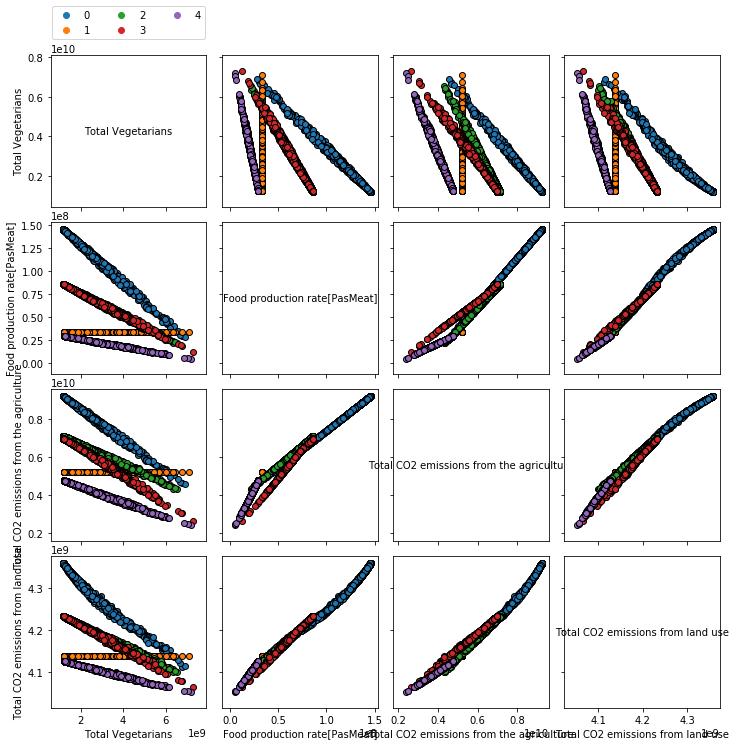

In [20]:
import matplotlib.pyplot as plt
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(results, 
                                         outcomes_to_show=['Total Vegetarians', 'Food production rate[PasMeat]',
                                                           'Total CO2 emissions from the agriculture',
                                                           'Total CO2 emissions from land use'
                                                          ],
                                         group_by='Diet Composition Switch', 
                                         point_in_time=-1,
                                         legend=True)
fig.set_size_inches(12,12)
plt.show()

In [51]:
from ema_workbench.analysis.plotting import lines, envelopes
from ema_workbench.analysis.plotting_util import KDE, VIOLIN, HIST, BOXPLOT


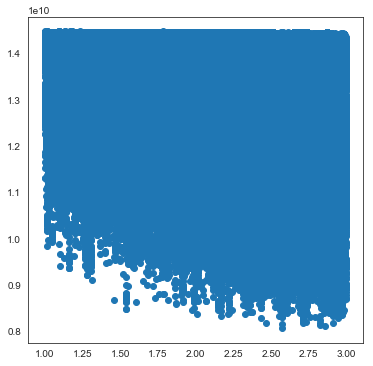

In [58]:
import matplotlib.pyplot as plt
#results_sa5000 = load_results('./Diet_Composition0234_10000_v2.tar.gz')
#fig, axes = envelopes(results_10k, 'Total Agricultural and Land Use Emissions', density=KDE, fill=True, group_by='Diet Composition Switch')  
fig, ax = plt.subplots()
ax.scatter(x=exeriments['SA Time to forget climate events'], y=data) # data is the emissions in the outcomes of 5000 Sobol runs
fig.set_size_inches(6,6)
plt.show()

In [1]:
# PRIM ON THE REFERENCE SCENARIO
import ema_workbench.analysis.prim as prim
import numpy as np
def classify(data):
    #get the output for deceased population
    result = data['Total Agricultural and Land Use Emissions']
    #result = data['Percentage of vegetarian diet followers']
    #make an empty array of length equal to number of cases 
    classes =  np.zeros(result.shape[0])
    
    #if agricultural co2 emissions are lower than 7B, classify as 1 
    classes[result[:, -1] < .95e+10] = 1
    
    return classes

C:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
from ema_workbench import load_results
results_lhs = load_results('./Diet_Composition0234_10000_v2.tar.gz')

In [3]:
exp_lhs, out_lhs = results_lhs

In [4]:
# results for only the reference scenario
logical_index = [exp_lhs['Diet Composition Switch'] == 0]
ref_experiments = exp_lhs[logical_index]
ref_outcomes = {}
for key, value in out_lhs.items():
    ref_outcomes[key] = value[logical_index]
ref_results = ref_experiments, ref_outcomes

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


(2500, 201)
for variable Total Agricultural and Land Use Emissions, will look for scenarios < than 12532736768.0.
there are 625 scenarios of interest.


C:\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:628: ImportWarning: mpldatacursor not installed
  warnings.warn("mpldatacursor not installed", ImportWarning)


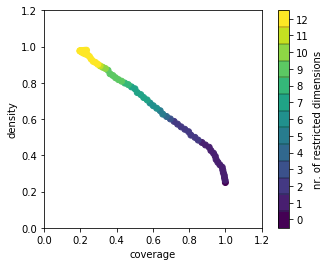

In [6]:
import matplotlib.pyplot as plt
ooi = 'Total Agricultural and Land Use Emissions'
sign = '<'

x = ref_experiments
data = ref_outcomes[ooi]
print(data.shape)
if sign == '<':
    qr = np.percentile(data[:, -1], 25)
    y = data[:, -1] <= qr
elif sign == '>':
    qr = np.percentile(data[:, -1], 75)
    y = data[:, -1] >= qr
print("for variable {}, will look for scenarios {} than {}.".format(ooi, sign, qr))
print("there are {} scenarios of interest.".format(sum(y)))

#define the prim object
prim_obj = prim.Prim(x, y, mass_min=0.05, threshold=0.8, peel_alpha=0.05)
box1 = prim_obj.find_box()
box1.show_tradeoff()
#plt.savefig('./prim_tradeoff_sc{}_{}.png'.format(sc, ooi), dpi=300)
plt.show()

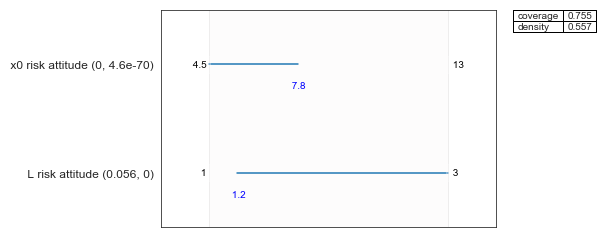

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import ema_workbench.analysis.prim as prim
sns.set_style("white")
fig, ax = box1.inspect(21, style='graph')
ylabels = ax.get_yticklabels()
ylabels = [item.get_text()[2:] for item in ylabels]
ax.set_yticklabels(ylabels, fontsize=12)

plt.savefig("Prim_sc0_v2_box21.png", dpi=600,  bbox_inches='tight')

plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


(2500, 201)
for variable Total Agricultural and Land Use Emissions, will look for scenarios < than 9016984576.0.
there are 625 scenarios of interest.


C:\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:628: ImportWarning: mpldatacursor not installed
  warnings.warn("mpldatacursor not installed", ImportWarning)


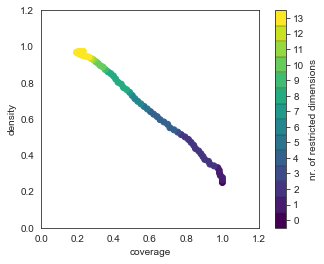

In [8]:
#REPEAT FOR SC3 
import numpy as np
import ema_workbench.analysis.prim as prim
import matplotlib.pyplot as plt
ooi = 'Total Agricultural and Land Use Emissions'
sign = '<'

logical_index = [exp_lhs['Diet Composition Switch'] == 4]
ref_experiments = exp_lhs[logical_index]
ref_outcomes = {}
for key, value in out_lhs.items():
    ref_outcomes[key] = value[logical_index]
ref_results = ref_experiments, ref_outcomes

x = ref_experiments
data = ref_outcomes[ooi]
print(data.shape)
if sign == '<':
    qr = np.percentile(data[:, -51], 25)
    y = data[:, -51] <= qr
elif sign == '>':
    qr = np.percentile(data[:, -51], 75)
    y = data[:, -51] >= qr
print("for variable {}, will look for scenarios {} than {}.".format(ooi, sign, qr))
print("there are {} scenarios of interest.".format(sum(y)))

#define the prim object
prim_obj = prim.Prim(x, y, mass_min=0.05, threshold=0.8, peel_alpha=0.05)
box1 = prim_obj.find_box()
box1.show_tradeoff()
#plt.savefig('./prim_tradeoff_sc{}_{}.png'.format(sc, ooi), dpi=300)
plt.show()

In [18]:
qr = np.percentile(data[:, -51], 25)
qr

9016984576.0

In [39]:
print(min(out_lhs['Total Agricultural and Land Use Emissions'][:, -51]))
print(max(out_lhs['Total Agricultural and Land Use Emissions'][:, -51]))

7040174592.0
14286305280.0


In [41]:
print(min(ref_outcomes['Total Agricultural and Land Use Emissions'][:, -51]))
print(max(ref_outcomes['Total Agricultural and Land Use Emissions'][:, -51]))

7897840640.0
11612937216.0


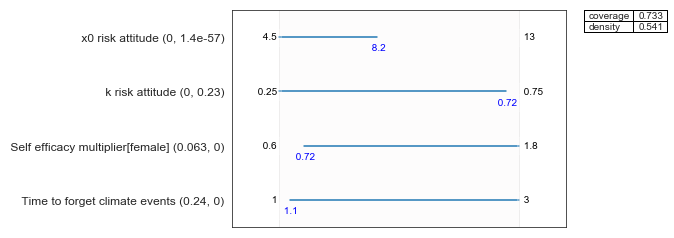

In [9]:
fig, ax = box1.inspect(21, style='graph')
ylabels = ax.get_yticklabels()
ylabels = [item.get_text()[2:] for item in ylabels]
ax.set_yticklabels(ylabels, fontsize=12)

plt.savefig("Prim_sc3_v2_box21.png", dpi=600,  bbox_inches='tight')

plt.show()

coverage      0.5504
density     0.683897
id                31
mass          0.2012
mean        0.683897
res_dim            6
Name: 31, dtype: object

                                              box 31            \
                                                 min       max   
SA x0 risk attitude                         4.501508  8.184329   
SA k risk attitude                          0.250100  0.595860   
SA Self efficacy multiplier[female]         0.772448  1.799175   
SA Self efficacy multiplier[male]           0.481133  1.199190   
SA Time to forget climate events            1.086670  2.999162   
SA Normal fraction intended to change diet  0.021930  0.059999   

                                                                          
                                                               qp values  
SA x0 risk attitude                         [0.0, 4.293070277508998e-50]  
SA k risk attitude                          [0.0, 6.251578729573802e-08]  
SA Self efficacy mul

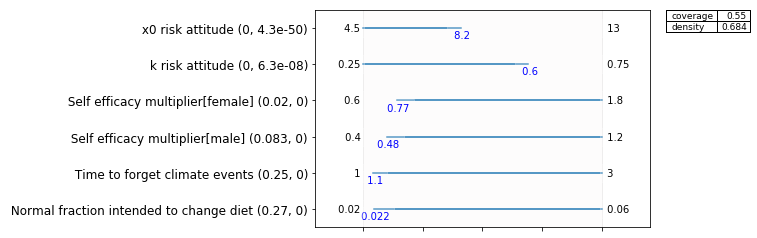

In [9]:
box1.inspect(31)
fig, ax = box1.inspect(31, style='graph')
ylabels = ax.get_yticklabels()
ylabels = [item.get_text()[2:] for item in ylabels]
ax.set_yticklabels(ylabels, fontsize=12)

plt.savefig("Prim_sc3_v2.png", dpi=600,  bbox_inches='tight')

plt.show()

In [ ]:
ax.c

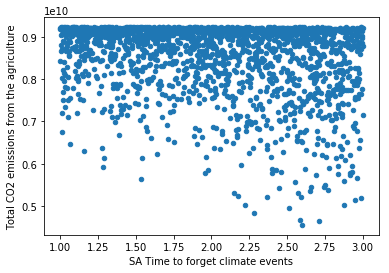

In [79]:
df_toplot = pd.DataFrame()
df_toplot['SA Time to forget climate events'] = ref_experiments['SA Time to forget climate events']
df_toplot['Total CO2 emissions from the agriculture'] = ref_outcomes['Total CO2 emissions from the agriculture'][:, -1]
df_toplot.plot.scatter('SA Time to forget climate events', 'Total CO2 emissions from the agriculture')

### Visualize the Prim Results

In [66]:
import pandas as pd
f_dir = 'H:/MyDocuments/IIASA-Felix/Felix outputs/Diet/PRIM/'
f1 = 'Prim_sc0_Total Agricultural and Land Use Emissions_box31.csv'
f2 = 'Prim_sc4_Total Agricultural and Land Use Emissions_box31.csv'
df1 = pd.read_csv(f_dir+f1, index_col='Parameters')
df2 = pd.read_csv(f_dir+f2, index_col='Parameters')

In [ ]:
def vis_primbox(df):
    

In [67]:
df1.head()

,min,max,qp values
Parameters,,,
SA x0 risk attitude,4.500864,7.496713,[1.6288731217840778e-65]
SA Normal fraction intended to change diet,0.026061,0.059966,[0.013614769976391576]
SA L risk attitude,1.240601,2.999712,[0.04445395915568099]
SA Time to forget climate events,1.195530,2.999708,[0.04994870020626455]
SA k risk attitude,0.250554,0.721825,[0.24829782368278755]


# SENSITIVITY ANALYSIS

In [6]:
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS

from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import CLASSIFICATION, REGRESSION
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol

C:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [7]:
# only for the reference diet composition
vensimModel.uncertainties = [RealParameter(row['Uncertainties'], row['Min'], row['Max']) for index, row in df_unc.iterrows()] 

In [11]:
from ema_workbench import MultiprocessingEvaluator
n_scenarios = 2000
ema_logging.log_to_stderr(ema_logging.INFO)
#with MultiprocessingEvaluator(vensimModel) as evaluator:
results_sa = perform_experiments(vensimModel, 500, uncertainty_sampling=SOBOL)
fn = './Diet_Sobol_500.tar.gz'
save_results(results_sa, fn)

[MainProcess/INFO] performing 28000 scenarios * 1 policies * 1 model(s) = 28000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 2800 cases completed
[MainProcess/INFO] 5600 cases completed
[MainProcess/INFO] 8400 cases completed
[MainProcess/INFO] 11200 cases completed
[MainProcess/INFO] 14000 cases completed
[MainProcess/INFO] 16800 cases completed
[MainProcess/INFO] 19600 cases completed
[MainProcess/INFO] 22400 cases completed
[MainProcess/INFO] 25200 cases completed
[MainProcess/INFO] 28000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] results saved successfully to H:\MyDocuments\Notebooks\IIASA_Felix\Diet_Sobol_500.tar.gz


In [8]:
results_sa = load_results('H:/MyDocuments/EclipseWorkspace/VensimTest/src/Diet_Sobol_5000.tar.gz')
exeriments, outcomes = results_sa

In [9]:
outcomes['Total Agricultural and Land Use Emissions'].shape

(280000,)

In [13]:
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol
data = outcomes['Total Agricultural and Land Use Emissions']#[:, -1]
problem = get_SALib_problem(vensimModel.uncertainties)
scores = sobol.analyze(problem, data, calc_second_order=True, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
SA Climate Risk Perception Delay[noEd] -0.000016 0.000341 0.000073 0.000010
SA Climate Risk Perception Delay[primary] 0.000117 0.000219 0.000036 0.000009
SA Climate Risk Perception Delay[secondary] 0.000213 0.000313 0.000077 0.000011
SA Climate Risk Perception Delay[tertiary] 0.000095 0.000161 0.000014 0.000005
SA L risk attitude 0.053187 0.009743 0.080421 0.005440
SA L social norm["10-14"] -0.000656 0.001260 0.001147 0.000089
SA L social norm["20-24"] 0.012091 0.005954 0.022847 0.001844
SA L social norm["40-44"] 0.007452 0.004079 0.009994 0.000900
SA L social norm["80-84"] 0.000245 0.001450 0.001362 0.000124
SA Normal fraction intended to change diet 0.051881 0.009906 0.079350 0.005137
SA Response efficacy multiplier[noEd] 0.000513 0.002146 0.003017 0.000218
SA Response efficacy multiplier[primary] 0.000491 0.001551 0.001834 0.000127
SA Response efficacy multiplier[secondary] 0.010911 0.004958 0.019316 0.001449
SA Response efficacy multiplier[tertiary] 

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
scores_filtered = {k:scores[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

#order si_df according to highest st
Si_df.sort_values(by=['ST'], ascending=False, inplace=True)
Si_df.head()


,S1,S1_conf,ST,ST_conf
SA x0 risk attitude,0.307194,0.023336,0.421895,0.024183
SA Time to forget climate events,0.139246,0.017151,0.212477,0.014931
"SA x0 social norm[""20-24""]",0.058692,0.011701,0.099720,0.007340
SA Self efficacy multiplier[female],0.050531,0.010480,0.081370,0.004892
SA L risk attitude,0.053187,0.009743,0.080421,0.005440


In [33]:
indices.loc['SA L social norm["80-84"]', :]

S1    0.000245
ST    0.001362
Name: SA L social norm["80-84"], dtype: float64

In [34]:
Si_df = Si_df[Si_df['ST'] > 0.0015]

In [40]:
Si_df = Si_df.iloc[::-1]

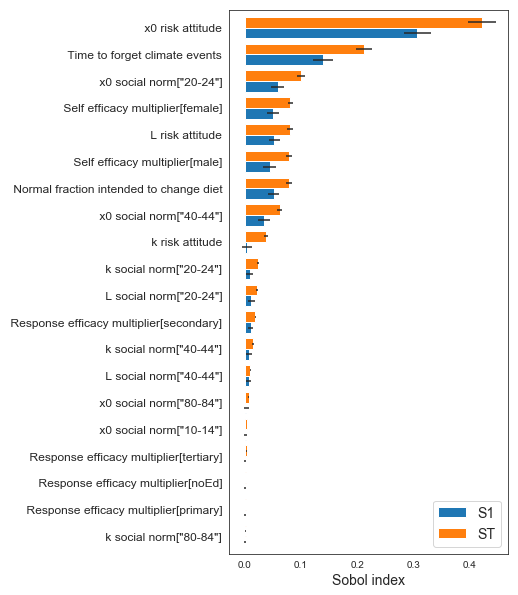

In [50]:
indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

sns.set_style('white')
f, ax = plt.subplots(figsize=(5, 10))

indices.plot.barh(xerr=err.values.T,ax=ax, width=.8)
ax.set_ylabel('')
ax.set_xlabel('Sobol index', fontsize=14)

ylabels = ax.get_yticklabels()
ylabels = [item.get_text()[2:] for item in ylabels]
ax.set_yticklabels(ylabels, fontsize=12)

ax.legend(loc=4, scatterpoints = 1, fontsize=14)#, bbox_to_anchor=(0.425, .9), borderaxespad=0.)
plt.savefig("Sobol_n5000_Emissions_vertical.png", dpi=600,  bbox_inches='tight')
plt.show()

                                                   S1   S1_conf        ST  \
SA Climate Risk Perception Delay[noEd]      -0.000016  0.000341  0.000073   
SA Climate Risk Perception Delay[primary]    0.000117  0.000219  0.000036   
SA Climate Risk Perception Delay[secondary]  0.000213  0.000313  0.000077   
SA Climate Risk Perception Delay[tertiary]   0.000095  0.000161  0.000014   
SA L risk attitude                           0.053187  0.009743  0.080421   

                                              ST_conf  
SA Climate Risk Perception Delay[noEd]       0.000010  
SA Climate Risk Perception Delay[primary]    0.000009  
SA Climate Risk Perception Delay[secondary]  0.000011  
SA Climate Risk Perception Delay[tertiary]   0.000005  
SA L risk attitude                           0.005440  


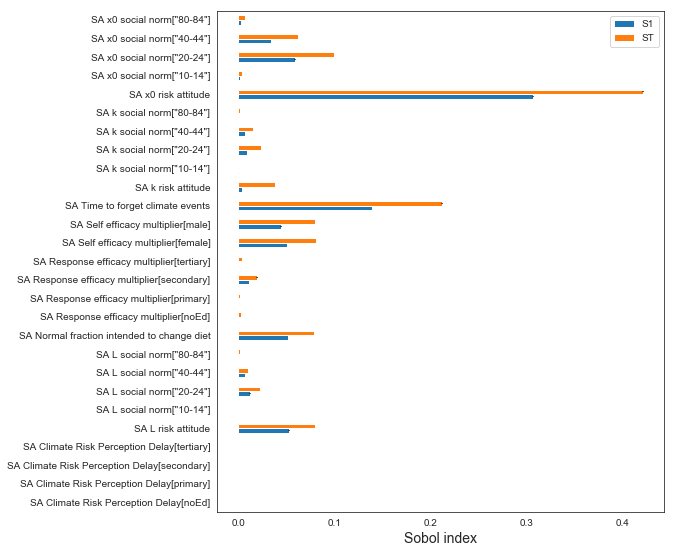

In [17]:

def plot_scores(scores):
    scores_filtered = {k:scores[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])
    #Si_df.to_csv(directory+"SobolIndices_n500.csv")
    #order si_df according to highest st
    Si_df.sort_values(by=['ST'])
    print(Si_df.head())
    sns.set_style('white')
    f, ax = plt.subplots(figsize=(8, 12))
    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]
    indices.plot.barh(yerr=err.values.T,ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel('Sobol index', fontsize=14)
    #ax.set_title("Top 20 most common words", fontsize=22, fontweight='bold')
    #fig.set_size_inches(12,8)
    f.subplots_adjust(bottom=0.3)
    #plt.savefig("Sobol_n5000_Emissions.png", dpi=600,  bbox_inches='tight')
    return f

plot_scores(scores)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [14]:
diet_data

,Average Diet Composition FAO 2013,Flexitarian Diet,Health Diet WHO - Springmann,World Ref Diet Composition - WRI,Meat diet,Vegetarian,Weighted average,color
PasMeat,1.77,0.45,1.34,1.8,2.3,0.0,0,darkred
CropMeat,7.54,2.52,4.09,6.7,7.2,0.0,0,indianred
Dairy,6.92,7.98,7.78,4.0,6.7,7.0,0,tomato
Eggs,1.25,0.76,0.74,1.2,1.0,2.0,0,lightsalmon
Grains,46.11,29.99,29.23,54.0,46.8,52.0,0,green
Pulses,2.36,7.06,6.88,2.3,2.0,3.8,0,darkgreen
VegFruits,12.77,12.06,11.76,10.0,8.0,12.0,0,limegreen
OtherCrops,20.40,38.43,37.45,20.0,26.0,26.0,0,lightgreen


In [15]:
animal = diet_data.index[:4]
plant = diet_data.index[4:]

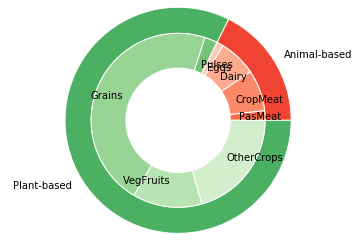

In [5]:

# Make data: I have 3 groups and 7 subgroups
group_names=['Animal-based', 'Plant-based']
group_size=[diet_data.loc[animal, 'Average Diet Composition FAO 2013'].sum(), diet_data.loc[plant, 'Average Diet Composition FAO 2013'].sum()]
subgroup_names=list(diet_data.index)
subgroup_size=list(diet_data['Average Diet Composition FAO 2013'])
 
# Create colors
a, b=[plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), a(0.2), b(0.5), b(0.4), b(0.3), b(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:638: UserWarning: Unrecognized location "upper corner". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


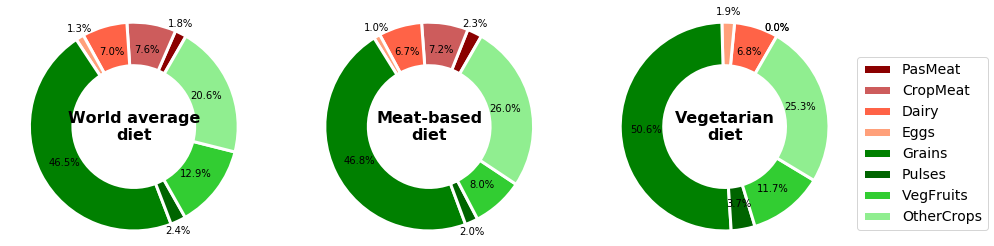

In [46]:
for i,pct in enumerate(fr3):
    if i==0:
        print(pct.get_text())

0.0%
